In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
FOLDER_ANT  = "KS91_K562_ASTARRseq_peak_macs_input"
FOLDER_LOOP = "hic_intact_deep"

In [3]:
fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
dir(fdiry)

[1] "loopA.annotation.KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz"
[2] "loopB.annotation.KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed.gz"
[3] "network_ocr_edge_simplify.tsv"                                                             
[4] "network_ocr_metric_edge.csv"                                                               
[5] "network_ocr_metric_node.csv"                                                               
[6] "network_ocr_node.tsv"

In [4]:
fdiry = file.path(FD_RES, "results", "region", FOLDER_LOOP, "loop", FOLDER_ANT)
fname = "network_ocr_metric_node.csv"
fpath = file.path(fdiry, fname)

dat = read_csv(fpath)

dat_network_ocr_metric_node = dat
print(dim(dat))
head(dat)

Rows: 49673 Columns: 18
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): name, shared name
dbl (14): AverageShortestPathLength, BetweennessCentrality, ClosenessCentral...
lgl  (2): IsSingleNode, selected

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 49673    18


AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>
10.48712,4.919747e-01,0.09535502,0.1000000,5,19,FALSE,chr10:100045961-100046653,3.80,0,5,0,0.3675250,FALSE,0,chr10:100045961-100046653,839830,0.2285714
10.86052,2.724630e-02,0.09207666,0.1666667,4,20,FALSE,chr10:100433434-100434444,4.50,0,4,0,0.3426323,FALSE,0,chr10:100433434-100434444,33716,0.3333333
11.78541,4.614888e-05,0.08485069,0.3333333,3,26,FALSE,chr10:100185017-100187275,3.00,0,3,0,0.2809728,FALSE,0,chr10:100185017-100187275,12,0.5333333
11.78112,1.282016e-02,0.08488160,0.3333333,3,26,FALSE,chr10:100267066-100268374,3.00,0,3,0,0.2812589,FALSE,0,chr10:100267066-100268374,7662,0.4444444
10.81330,2.118233e-03,0.09247867,0.0000000,2,25,FALSE,chr10:100370571-100371646,7.50,0,2,0,0.3457797,FALSE,0,chr10:100370571-100371646,2546,0.5416667
10.80043,2.335595e-02,0.09258891,0.1666667,4,25,FALSE,chr10:100373060-100374238,4.75,0,4,0,0.3466381,FALSE,0,chr10:100373060-100374238,15290,0.3035714


In [10]:
dat = dat_network_ocr_metric_node
summary(dat$Degree)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.388   5.000  38.000 

In [16]:
dat = dat_network_ocr_metric_node
summary(dat$BetweennessCentrality)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.001085 0.045834 0.021577 1.000000 

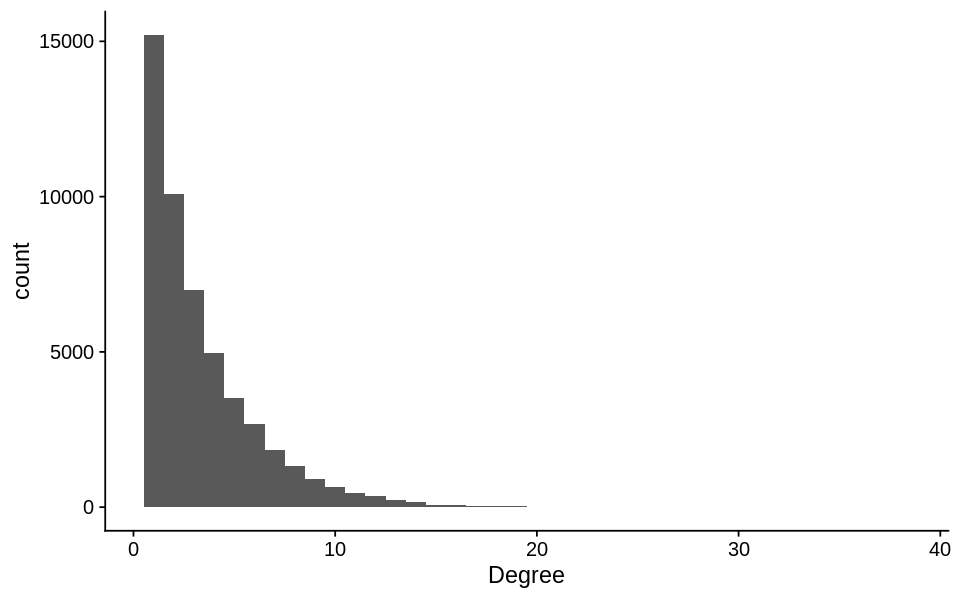

In [15]:
dat = dat_network_ocr_metric_node
gpt = ggplot(dat, aes(x=Degree)) + 
    geom_histogram(binwidth=1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

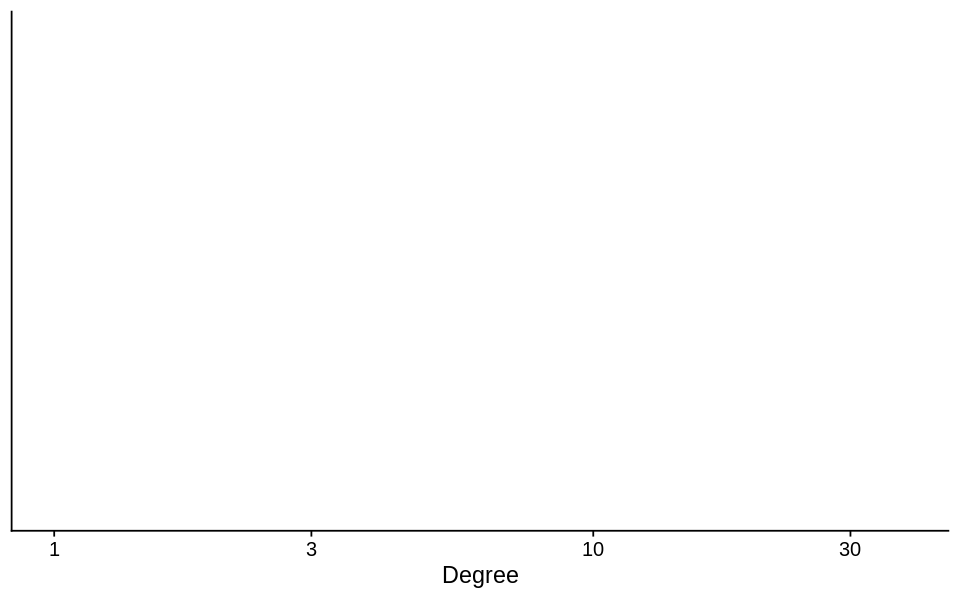

In [18]:
dat = dat_network_ocr_metric_node
gpt = ggplot(dat, aes(x=Degree)) + 
    scale_x_log10() +
    scale_y_log10() +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

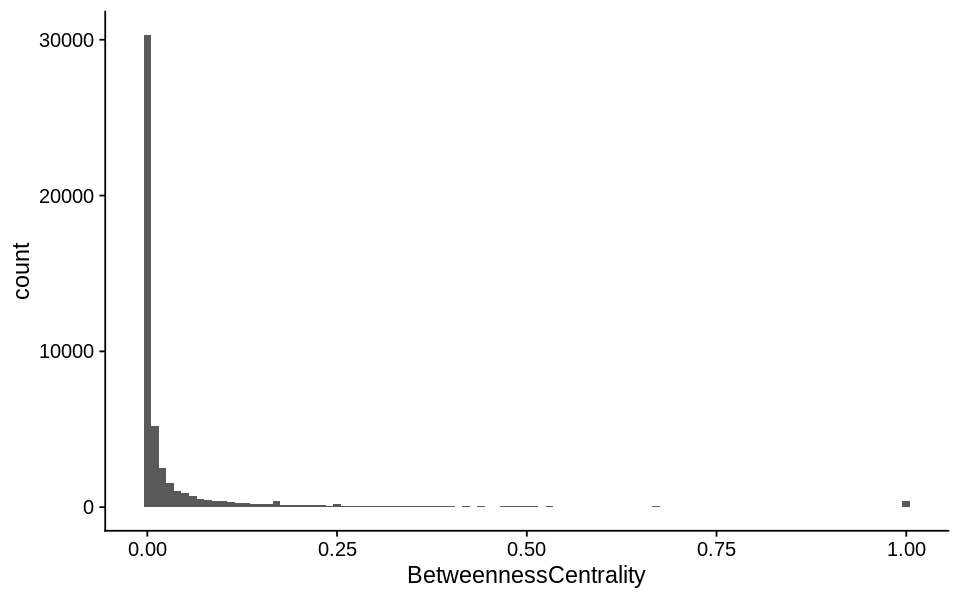

In [20]:
dat = dat_network_ocr_metric_node
gpt = ggplot(dat, aes(x=BetweennessCentrality)) + 
    geom_histogram(binwidth=0.01) + 
    theme_cowplot()

print(gpt)

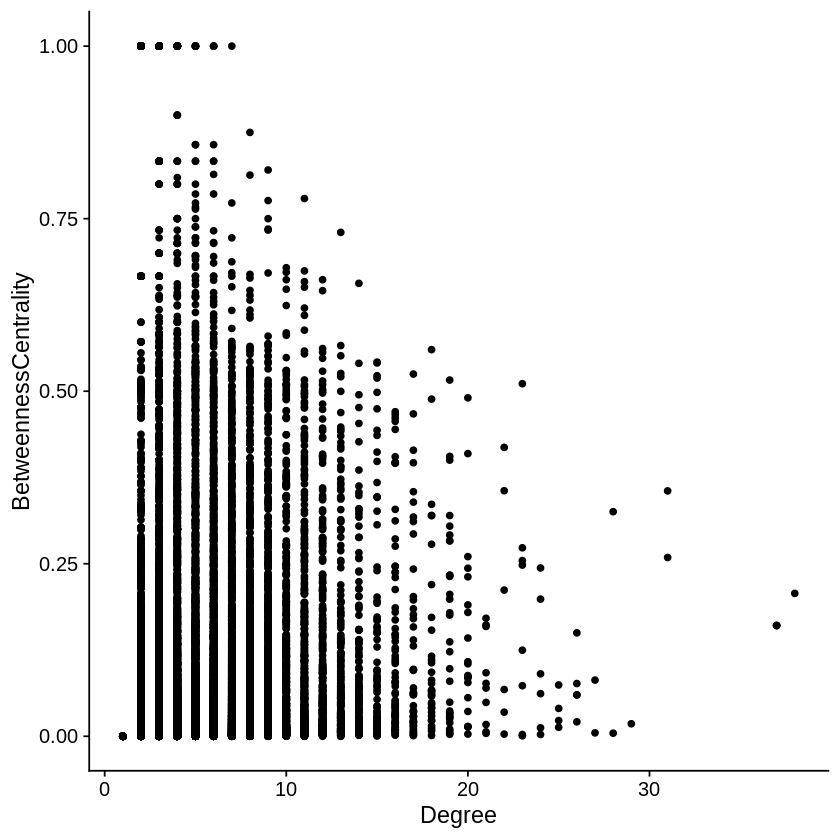

In [5]:
dat = dat_network_ocr_metric_node
gpt = ggplot(dat, aes(x=Degree, y=BetweennessCentrality)) + 
    geom_point() + 
    theme_cowplot()

print(gpt)